In [ ]:
# read a csv containing dataset of english words
# this csv file should be in my digminecraftstyle account
import pandas as pd
url='https://drive.google.com/file/d/1cfTcFhIVL4JHfHeNGkLcuMAUhFKjPpRx/view?usp=sharing' #PASTE THE URL TO THE PUBLICLY SHARED CSV FILE HERE
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

try:
    words = pd.read_csv(url, header=None, names=['word']) # Attempt to read the CSV file with default encoding
except:
    words = pd.read_csv(url, encoding='ISO-8859-1', header=None, names=['word'])  # Fallback encoding if the default fails    

words['word_len'] = words['word'].str.len() # Calculate the length of each word
words = words.dropna()
words['word_len'] = words['word_len'].astype(int)  # Convert word length to int
# convert words['word_len'] to int
print(words.head())

    word  word_len
0      a         1
1     aa         2
2    aaa         3
3    aah         3
4  aahed         5


In [2]:
# getting all 5-letter words

words_5letter = words[words['word_len'] == 5]
print(len(words_5letter))
print(words_5letter.sample(10))

15920
         word  word_len
324505  tirer         5
279904  scaup         5
196418  nabby         5
229572  pends         5
160130  jahve         5
107946  expos         5
176373  luser         5
192064  monks         5
194792  muggy         5
128073  gored         5


In [ ]:
# getting word frequency from csv file
# this csv file should be in my digminecraftstyle account
url2='https://drive.google.com/file/d/1rUk15edYjljHzYuKEq3Kdl9znVjaW_GV/view?usp=sharing' #PASTE THE URL TO THE PUBLICLY SHARED CSV FILE HERE
url2='https://drive.google.com/uc?id=' + url2.split('/')[-2]

try:
    word_frequency = pd.read_csv(url2) # Attempt to read the CSV file with default encoding
except:
    word_frequency = pd.read_csv(url2, encoding='ISO-8859-1')  # Fallback encoding if the default fails  

# getting all 5-letter words from word frequency
word_frequency_5letter = word_frequency[word_frequency['word_len'] == 5]
word_frequency_5letter.reset_index(drop=True, inplace=True)  # Reset index after filtering
print(len(word_frequency_5letter))
print(word_frequency_5letter.head(6000))

39933
       Rank   word       count  word_len
0        36  about  1226734006         5
1        46  other   978481319         5
2        57  which   810514085         5
3        58  their   782849411         5
4        63  there   701170205         5
...     ...    ...         ...       ...
5995  51197  fripp      319829         5
5996  51203  duped      319795         5
5997  51205  nigra      319754         5
5998  51222  habbo      319599         5
5999  51225  rumps      319557         5

[6000 rows x 4 columns]


In [4]:
# ensuring word_frequency_5letter is in words_5letter

word_frequency_5letter['in_words_5letter'] = word_frequency_5letter['word'].isin(words_5letter['word'].values)
print(word_frequency_5letter.head(6000))

       Rank   word       count  word_len  in_words_5letter
0        36  about  1226734006         5              True
1        46  other   978481319         5              True
2        57  which   810514085         5              True
3        58  their   782849411         5              True
4        63  there   701170205         5              True
...     ...    ...         ...       ...               ...
5995  51197  fripp      319829         5             False
5996  51203  duped      319795         5              True
5997  51205  nigra      319754         5             False
5998  51222  habbo      319599         5             False
5999  51225  rumps      319557         5              True

[6000 rows x 5 columns]


C:\Users\ongch\AppData\Local\Temp\ipykernel_51732\440068594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  word_frequency_5letter['in_words_5letter'] = word_frequency_5letter['word'].isin(words_5letter['word'].values)


In [5]:
word_frequency_5letter_filtered = word_frequency_5letter[word_frequency_5letter['in_words_5letter'] == True]
word_frequency_5letter_filtered.reset_index(drop=True, inplace=True)
word_frequency_5letter_filtered = word_frequency_5letter_filtered.head(4000)
word_frequency_5letter_filtered['Rank'] = word_frequency_5letter_filtered.index + 1
print(word_frequency_5letter_filtered)

      Rank   word       count  word_len  in_words_5letter
0        1  about  1226734006         5              True
1        2  other   978481319         5              True
2        3  which   810514085         5              True
3        4  their   782849411         5              True
4        5  there   701170205         5              True
...    ...    ...         ...       ...               ...
3995  3996  glebe      371095         5              True
3996  3997  motte      371048         5              True
3997  3998  volga      371044         5              True
3998  3999  brews      369926         5              True
3999  4000  hamel      369886         5              True

[4000 rows x 5 columns]


Area under the curve: 0.999750062484379
0.9999999999999977


C:\Users\ongch\AppData\Local\Temp\ipykernel_51732\1125179816.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(y, x)


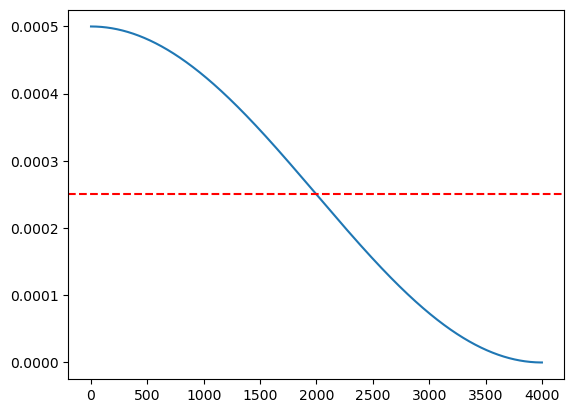

In [6]:
# creating a probability distribution for the first 3000 words

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,4001)
y= np.cos(((1/4000)*np.pi*x))/4000 + (1/4000)
y = y/y.sum()

plt.plot(x, y, label='Cosine Wave')
plt.axhline(y=1/4000, color='red', linestyle='--', label='y = 1/3000')
area = np.trapz(y, x)
print("Area under the curve:", area)
print(sum(y))

In [7]:
# assigning probability to the word_frequency_5letter_filtered dataframe
print(len(word_frequency_5letter_filtered))
y = y[:4000]
print(y.sum())
print(len(y))
word_frequency_5letter_filtered['Probability'] = y
print(word_frequency_5letter_filtered)

4000
1.0
4000
      Rank   word       count  word_len  in_words_5letter   Probability
0        1  about  1226734006         5              True  4.998750e-04
1        2  other   978481319         5              True  4.998750e-04
2        3  which   810514085         5              True  4.998747e-04
3        4  their   782849411         5              True  4.998743e-04
4        5  there   701170205         5              True  4.998738e-04
...    ...    ...         ...       ...               ...           ...
3995  3996  glebe      371095         5              True  1.927173e-09
3996  3997  motte      371048         5              True  1.233391e-09
3997  3998  volga      371044         5              True  6.937828e-10
3998  3999  brews      369926         5              True  3.083480e-10
3999  4000  hamel      369886         5              True  7.708701e-11

[4000 rows x 6 columns]


In [8]:
# random choice of a 5-letter words according to their probabilities

print(str(np.random.choice(word_frequency_5letter_filtered['word'].values, p=y, size=1)))

['wills']


In [9]:
# get target answer

target = str(np.random.choice(word_frequency_5letter_filtered['word'].values, p=y, size=1)[0])
print("Target word:", target)


Target word: dummy


In [10]:
# get target answer as an array

target_array = np.array(list(str.upper(target)))
print(target_array)

['D' 'U' 'M' 'M' 'Y']


In [11]:
# getting user input as array
possible_letters = np.array(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))
round = 0
while round < 5:

    print(f"Round {round + 1} of 5")
    print("Possible letters:", possible_letters)

    user_input = input("Enter your guess: ")


    if user_input.lower() not in word_frequency_5letter_filtered['word'].values:
        print(np.array(list(str.upper(user_input))))
        print("Invalid input. Please enter a valid 5-letter word.")
    else:
        user_input_array = np.array(list(str.upper(user_input)))
        print(user_input_array)
        # compare user input with target answer
        checker = np.zeros(5, dtype=str)
        for i in range(5):
            if user_input_array[i] == target_array[i]:
                checker[i] = 'O'
            elif user_input_array[i] in target_array:
                checker[i] = '?'
            else:
                checker[i] = 'X'
                possible_letters = possible_letters[possible_letters != user_input_array[i]]
        print(checker)
        if np.array_equal(user_input_array, target_array):
            print("Congratulations! You've guessed the word:", target)
            break
        else:
            round += 1

if round ==5:
    print("Game over! The target word was:", target)


Round 1 of 5
Possible letters: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
[]
Invalid input. Please enter a valid 5-letter word.
Round 1 of 5
Possible letters: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
['D' 'U' 'M' 'M' 'Y']
['O' 'O' 'O' 'O' 'O']
Congratulations! You've guessed the word: dummy
